# Assessing the Impact of Digital Transformation on Construction Management Practices and Project Outcomes in the UK

In [34]:
# Import dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as scikit_learn
from scipy.stats import pearsonr

In [2]:
df = pd.read_excel('./Survey Questionnaire Responses.xlsx', index_col=None)

In [3]:
df.head()

,Gender,Age Range,Position within the organization,Duration of employment in the organization\n,"On a scale of 1-5, how would you rate the extent of digital transformation in the UK construction industry?",Which digital technologies have been adopted in your organization or project?,Increased efficiency in construction processes.,Improved project outcomes and quality.,Enhanced communication and collaboration among project stakeholders,Reduced project risks and uncertainties,...,Quality of Construction,Safety,Client Satisfaction,Environmental Sustainability,High Initial Costs,Learning Curve,Resistance to change,Lack of skilled personnel,Data security concerns,Integration with existing systems
0,Man,25-34,Mid-level management,3-5 years,5,Building Information Modeling (BIM);Project M...,4,5,5,3,...,4,4,5,2,5,4,4,3,2,4
1,Woman,35-44,Senior Management,5+ years,3,Building Information Modeling (BIM);Project M...,5,3,5,4,...,3,3,3,4,5,3,5,5,2,4
2,Man,45-54,Mid-level management,5+ years,4,Building Information Modeling (BIM);Project M...,4,5,5,4,...,5,4,3,3,5,3,4,5,5,4
3,Woman,18-24,Junior Staff,5+ years,5,Building Information Modeling (BIM);Project M...,4,3,4,4,...,5,3,3,3,5,5,4,4,4,4
4,Man,35-44,Senior Management,5+ years,4,Building Information Modeling (BIM);Project M...,4,3,5,4,...,5,4,4,5,4,3,4,4,5,5


In [4]:
df.describe()

,"On a scale of 1-5, how would you rate the extent of digital transformation in the UK construction industry?",Increased efficiency in construction processes.,Improved project outcomes and quality.,Enhanced communication and collaboration among project stakeholders,Reduced project risks and uncertainties,Greater competitiveness in the construction industry.,Regulatory compliance and industry standards.,Client demands for digital capabilities.,Improved sustainability and environmental considerations.,Communication,...,Quality of Construction,Safety,Client Satisfaction,Environmental Sustainability,High Initial Costs,Learning Curve,Resistance to change,Lack of skilled personnel,Data security concerns,Integration with existing systems
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,82.000000,...,82.000000,82.000000,82.000000,82.000000,82.000000,82.00000,82.000000,82.000000,82.000000,82.000000
mean,3.865854,4.402439,3.987805,4.500000,3.914634,3.390244,3.414634,3.146341,3.158537,3.914634,...,4.024390,3.853659,3.987805,3.573171,4.573171,3.95122,4.548780,3.841463,3.573171,4.439024
std,0.857245,0.563493,0.867719,0.549972,0.804328,1.097203,1.143432,1.458241,1.469606,0.849128,...,0.831117,0.833288,0.838781,1.030767,0.497661,0.81502,0.500677,0.793018,1.133448,0.499322
min,1.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,1.000000,1.000000,3.000000,...,3.000000,3.000000,3.000000,2.000000,4.000000,3.00000,4.000000,3.000000,2.000000,4.000000
25%,3.000000,4.000000,3.000000,4.000000,3.000000,2.000000,2.000000,2.000000,2.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,4.000000,3.00000,4.000000,3.000000,2.250000,4.000000
50%,4.000000,4.000000,4.000000,5.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,...,4.000000,4.000000,4.000000,4.000000,5.000000,4.00000,5.000000,4.000000,4.000000,4.000000
75%,4.750000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,5.00000,5.000000,4.000000,4.750000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000


In [5]:
column_names = df.columns.tolist()
column_names

['Gender',
 'Age Range',
 'Position within the organization',
 'Duration of employment in the organization\n',
 'On a scale of 1-5, how would you rate the extent of digital transformation in the UK construction industry?',
 'Which digital technologies have been adopted in your organization or project?',
 'Increased efficiency in construction processes.',
 'Improved project outcomes and quality.',
 'Enhanced communication and collaboration among project stakeholders',
 'Reduced project risks and uncertainties',
 'Greater competitiveness in the construction industry.',
 'Regulatory compliance and industry standards.',
 'Client demands for digital capabilities.',
 'Improved sustainability and environmental considerations.',
 'Communication',
 'Risk Management',
 'Time Management',
 'Cost Management',
 'Quality Management',
 'Resource Management',
 'Contract Management',
 'Project Scheduling',
 'Budget Adherence',
 'Quality of Construction',
 'Safety',
 'Client Satisfaction',
 'Environment

In [6]:
# Renaming columns for ease of analysis
column_name_mapping = {
    'Gender': 'gender',
    'Age Range': 'age_range',
    'Position within the organization': 'position',
    'Duration of employment in the organization\n': 'employment_duration',
    'On a scale of 1-5, how would you rate the extent of digital transformation in the UK construction industry?': 'digital_transformation_rating',
    'Which digital technologies have been adopted in your organization or project?': 'adopted_technologies',
    'Increased efficiency in construction processes.': 'efficiency_increase',
    'Improved project outcomes and quality.': 'quality_improvement',
    'Enhanced communication and collaboration among project stakeholders': 'enhanced_communication',
    'Reduced project risks and uncertainties': 'risk_reduction',
    'Greater competitiveness in the construction industry.': 'competitiveness_increase',
    'Regulatory compliance and industry standards.': 'regulatory_compliance',
    'Client demands for digital capabilities.': 'client_demands',
    'Improved sustainability and environmental considerations.': 'sustainability_improvement',
    'Communication': 'communication',
    'Risk Management': 'risk_management',
    'Time Management': 'time_management',
    'Cost Management': 'cost_management',
    'Quality Management': 'quality_management',
    'Resource Management': 'resource_management',
    'Contract Management': 'contract_management',
    'Project Scheduling': 'project_scheduling',
    'Budget Adherence': 'budget_adherence',
    'Quality of Construction': 'construction_quality',
    'Safety': 'safety',
    'Client Satisfaction': 'client_satisfaction',
    'Environmental Sustainability': 'environmental_sustainability',
    'High Initial Costs': 'initial_costs',
    'Learning Curve': 'learning_curve',
    'Resistance to change': 'resistance_to_change',
    'Lack of skilled personnel': 'lack_of_skills',
    'Data security concerns': 'data_security',
    'Integration with existing systems': 'system_integration'
}
df.rename(columns=column_name_mapping, inplace=True)
df.columns

Index(['gender', 'age_range', 'position', 'employment_duration',
       'digital_transformation_rating', 'adopted_technologies',
       'efficiency_increase', 'quality_improvement', 'enhanced_communication',
       'risk_reduction', 'competitiveness_increase', 'regulatory_compliance',
       'client_demands', 'sustainability_improvement', 'communication',
       'risk_management', 'time_management', 'cost_management',
       'quality_management', 'resource_management', 'contract_management',
       'project_scheduling', 'budget_adherence', 'construction_quality',
       'safety', 'client_satisfaction', 'environmental_sustainability',
       'initial_costs', 'learning_curve', 'resistance_to_change',
       'lack_of_skills', 'data_security', 'system_integration'],
      dtype='object')

## Section A: Demographic Information

### Demographic data Summary

In [7]:
df[['gender', 'age_range', 'position', 'employment_duration']].describe()

,gender,age_range,position,employment_duration
count,82,82,82,82
unique,2,5,5,3
top,Man,45-54,Senior Management,5+ years
freq,61,22,52,80


In [8]:
def generate_summary(data, column_name):
    """
    Generate a summary table for a given column displaying frequency and percentage.
    
    Parameters:
    - data: DataFrame containing the data
    - column_name: Name of the column for which the summary is to be generated
    
    Returns:
    - summary_table: DataFrame containing the frequency and percentage for each category in the column
    """
    total = len(data)
    
    # Calculate frequency and percentage
    frequency = data[column_name].value_counts().sort_index()
    percentage = (frequency / total * 100).map('{:.2f}%'.format)
    
    # Create the summary table
    summary_table = pd.DataFrame({
        'Frequency': frequency,
        'Percentage': percentage
    })
    
    return summary_table

In [9]:
# Function to visualize demographic data
def visualize_demographic(data, column_name, title):
    """
    Visualize the distribution of a given column using a bar chart.
    
    Parameters:
    - data: DataFrame containing the data
    - column_name: Name of the column to visualize
    - title: Title for the chart
    
    The function displays a bar chart showing the frequency of each category in the column.
    It also annotates each bar with the percentage of the total.
    """
    
    # Calculate the frequency of each category
    counts = data[column_name].value_counts().sort_index()
    
    # Calculate the total number of entries
    total = len(data)
    
    # Create the bar chart
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x=counts.index, y=counts.values, palette='pastel')
    
    # Annotate each bar with the percentage of the total
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2.,
                height + 1,
                '{:1.2f}%'.format(height/total*100),
                ha="center")
    
    # Set the title and labels
    plt.title(title)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    # Adjust the layout for better display
    plt.tight_layout()
    
    # Display the chart
    plt.show()

### Gender

In [10]:
gender_summary = generate_summary(df, 'gender')
gender_summary

,Frequency,Percentage
Man,61,74.39%
Woman,21,25.61%


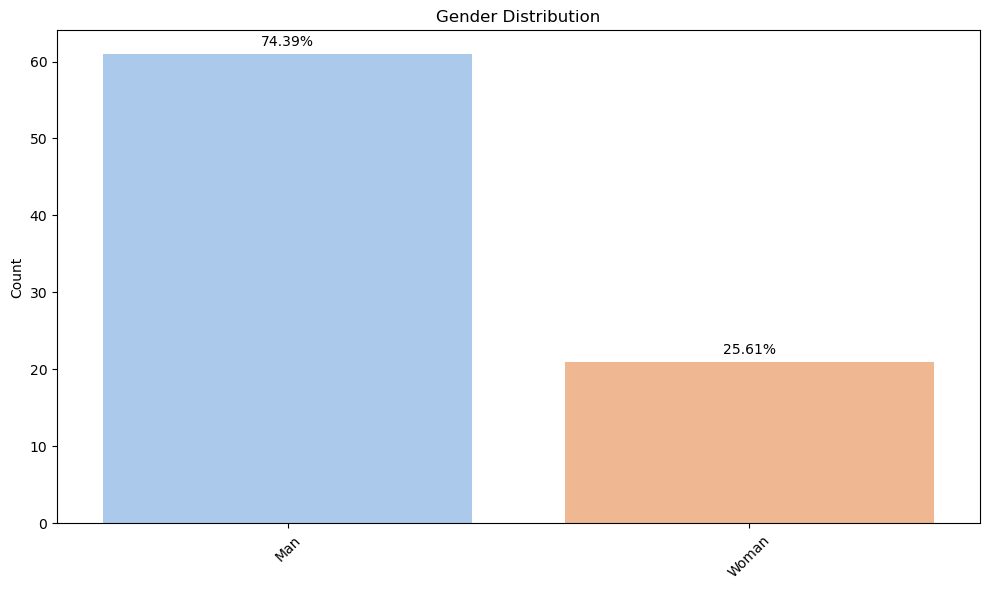

In [11]:
# Visualizing gender distribution
visualize_demographic(df, 'gender', 'Gender Distribution')

### Age Range

In [12]:
age_range_summary = generate_summary(df, 'age_range')
age_range_summary

,Frequency,Percentage
18-24,11,13.41%
25-34,17,20.73%
35-44,21,25.61%
45-54,22,26.83%
55+,11,13.41%


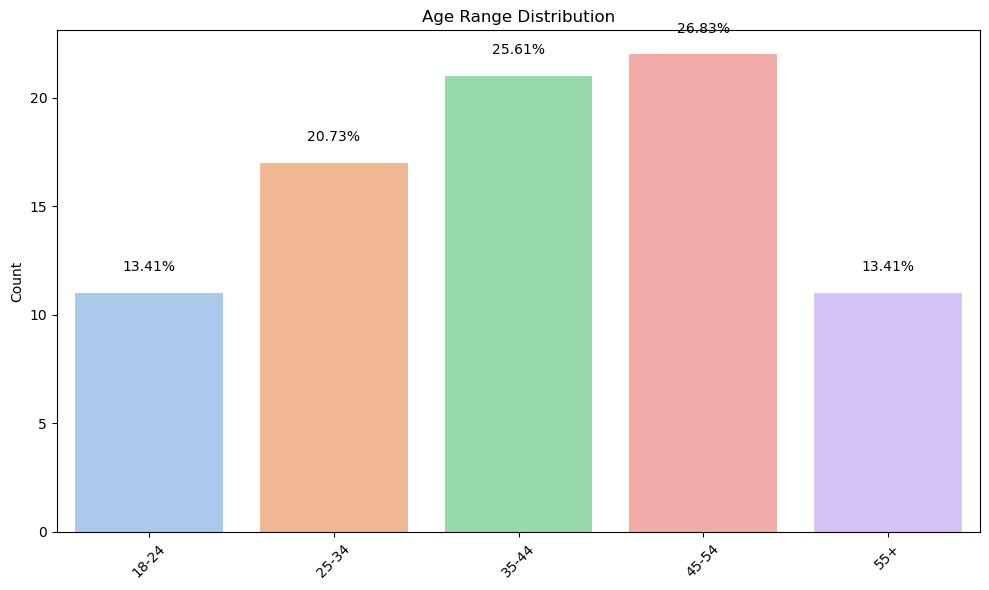

In [13]:
visualize_demographic(df, 'age_range', 'Age Range Distribution')

In [14]:
position_summary = generate_summary(df, 'position')
position_summary

,Frequency,Percentage
Executive,9,10.98%
Intern,1,1.22%
Junior Staff,10,12.20%
Mid-level management,10,12.20%
Senior Management,52,63.41%


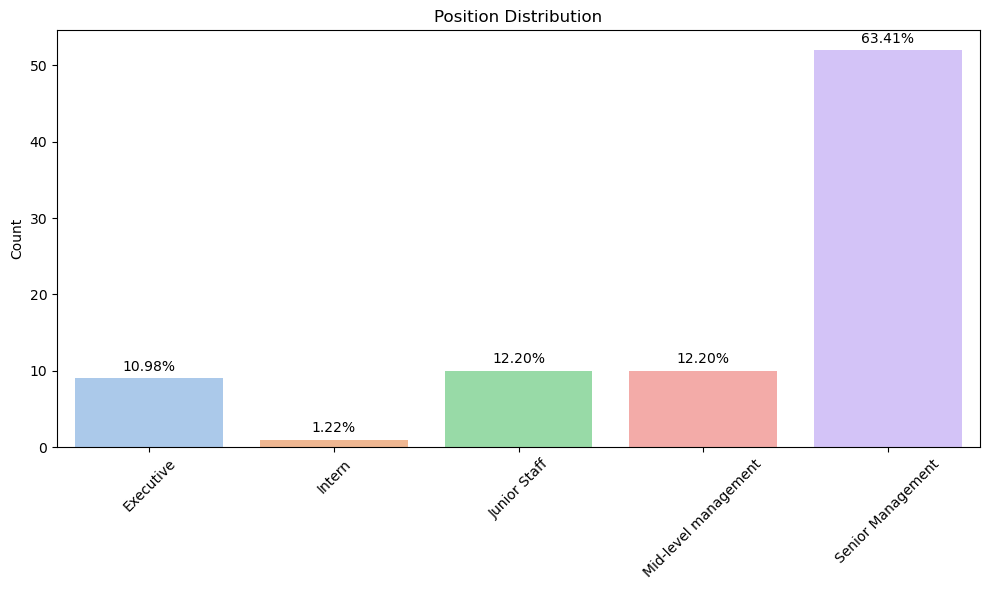

In [15]:
visualize_demographic(df, 'position', 'Position Distribution')

In [16]:
employment_duration_summary = generate_summary(df, 'employment_duration')
employment_duration_summary

,Frequency,Percentage
3-5 years,1,1.22%
5+ years,80,97.56%
Less than 1 year,1,1.22%


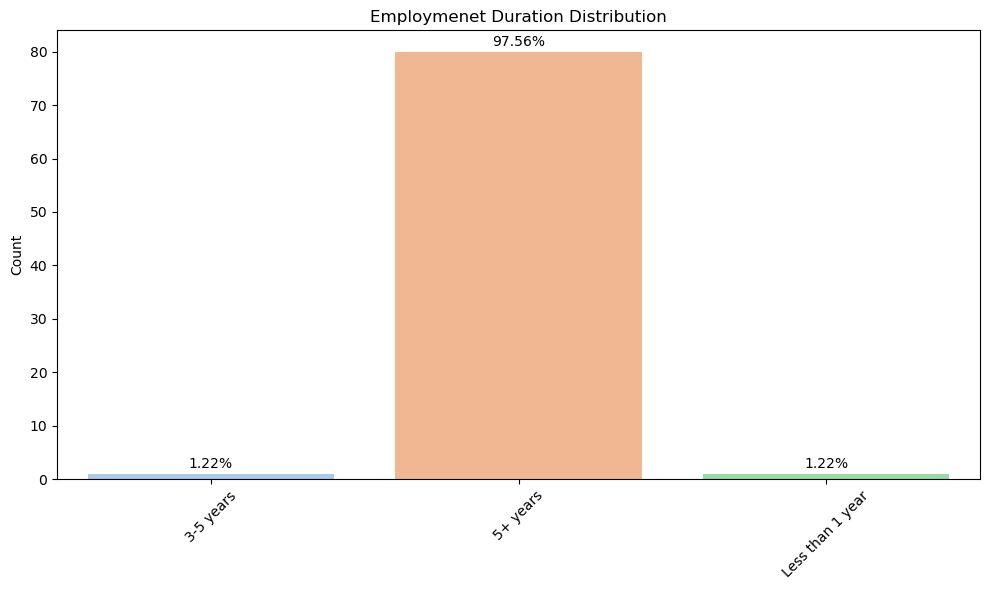

In [17]:
visualize_demographic(df, 'employment_duration', 'Employmenet Duration Distribution')

## SECTION B: Extent of Digital Transformation

In [23]:
df['digital_transformation_rating'] = pd.to_numeric(df['digital_transformation_rating'])
# Calculate the frequency and percentage distribution of the digital_transformation_rating
rating_counts = df['digital_transformation_rating'].value_counts().sort_index()
rating_percentage = (rating_counts / len(df) * 100).map('{:.2f}%'.format)

# Create a summary table
rating_summary = pd.DataFrame({
    'Frequency': rating_counts,
    'Percentage': rating_percentage
})

rating_summary


,Frequency,Percentage
1,1,1.22%
2,1,1.22%
3,27,32.93%
4,32,39.02%
5,21,25.61%


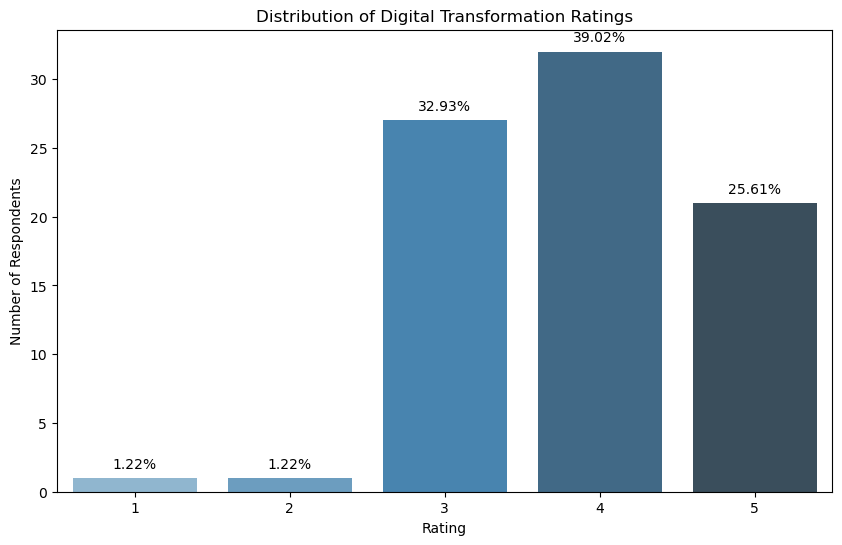

In [29]:

# Visualization of the digital_transformation_rating distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_summary.index, y=rating_summary['Frequency'], palette='Blues_d')
# Annotate the bars with percentages
for i, v in enumerate(rating_counts):
    plt.text(i, v + 0.5, f'{rating_percentage.iloc[i]}', ha='center', va='bottom', fontweight='light')
    
plt.title('Distribution of Digital Transformation Ratings')
plt.xlabel('Rating')
plt.ylabel('Number of Respondents')
plt.show()


### Drivers to Digital Transformation

In [30]:
# Extracting relevant columns for analysis
drivers_df = df[['efficiency_increase', 'quality_improvement', 'enhanced_communication', 'risk_reduction', 'competitiveness_increase', 'regulatory_compliance', 'client_demands', 'sustainability_improvement']]

# Likert scale mapping
likert_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

# Compute mean and standard deviation for each variable
mean = drivers_df.mean()
std_dev = drivers_df.std()

# Compute the percentage of each response (from the Likert scale) for the variables
percentage_responses = drivers_df.apply(lambda x: x.replace(likert_mapping).value_counts(normalize=True)).T.fillna(0) * 100

# Round the percentages to 2 decimal places and append percent sign
percentage_responses = percentage_responses.round(2).astype(str) + '%'

# Prepare the summary table
summary_drivers = pd.concat([mean, std_dev], axis=1)
summary_drivers.columns = ['Mean', 'Standard Deviation']

# Add percentage responses to the summary table
for key, value in likert_mapping.items():
    summary_drivers[f'{value}'] = percentage_responses[value]

summary_drivers


,Mean,Standard Deviation,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
efficiency_increase,4.402439,0.563493,0.0%,0.0%,3.66%,52.44%,43.9%
quality_improvement,3.987805,0.867719,0.0%,0.0%,37.8%,25.61%,36.59%
enhanced_communication,4.500000,0.549972,0.0%,0.0%,2.44%,45.12%,52.44%
risk_reduction,3.914634,0.804328,0.0%,0.0%,36.59%,35.37%,28.05%
competitiveness_increase,3.390244,1.097203,0.0%,28.05%,24.39%,28.05%,19.51%
regulatory_compliance,3.414634,1.143432,0.0%,29.27%,23.17%,24.39%,23.17%
client_demands,3.146341,1.458241,15.85%,24.39%,15.85%,17.07%,26.83%
sustainability_improvement,3.158537,1.469606,20.73%,13.41%,19.51%,21.95%,24.39%


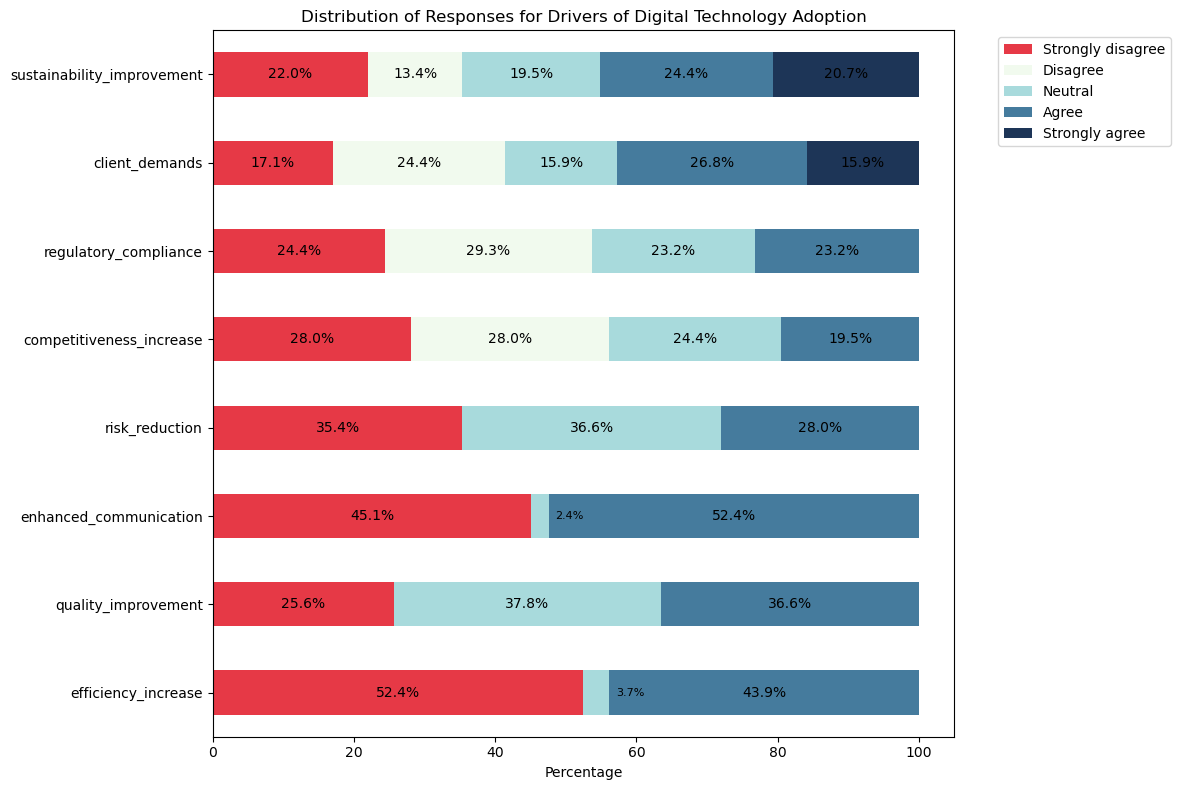

In [31]:
# Convert the counts into percentages
percentage_data = drivers_df.replace(likert_mapping).apply(lambda x: x.value_counts(normalize=True)).T.fillna(0) * 100

colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']  # color list
ax = percentage_data.plot(kind='barh', stacked=True, color=colors, figsize=(12, 8))

for index, rect in enumerate(ax.patches):
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    
    # Labeling segments conditionally
    if width > 5:
        ax.text(x + width/2., y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=10)
    elif width > 0:
        ax.text(x + width + 3, y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=8)

# Rest of the plot aesthetics
ax.set_xlabel('Percentage')
ax.set_title('Distribution of Responses for Drivers of Digital Technology Adoption')
ax.legend([likert_mapping[i] for i in range(1,6)], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Section C: Impact on Construction Management Practices

In [32]:
# Extracting relevant columns for analysis
management_practices_df = df[['communication', 'risk_management', 'time_management', 'cost_management', 'quality_management', 'resource_management', 'contract_management']]

# Likert scale mapping
likert_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

# Compute mean and standard deviation for each variable
mean = management_practices_df.mean()
std_dev = management_practices_df.std()

# Compute the percentage of each response (from the Likert scale) for the variables
percentage_responses = management_practices_df.apply(lambda x: x.replace(likert_mapping).value_counts(normalize=True)).T.fillna(0) * 100

# Round the percentages to 2 decimal places and append percent sign
percentage_responses = percentage_responses.round(2).astype(str) + '%'

# Prepare the summary table
summary_practices = pd.concat([mean, std_dev], axis=1)
summary_practices.columns = ['Mean', 'Standard Deviation']

# Add percentage responses to the summary table
for key, value in likert_mapping.items():
    summary_practices[f'{value}'] = percentage_responses[value]

summary_practices

,Mean,Standard Deviation,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
communication,3.914634,0.849128,0.0%,0.0%,40.24%,28.05%,31.71%
risk_management,4.109756,0.846286,0.0%,0.0%,30.49%,28.05%,41.46%
time_management,3.353659,1.115236,0.0%,29.27%,26.83%,23.17%,20.73%
cost_management,4.134146,0.781929,0.0%,0.0%,24.39%,37.8%,37.8%
quality_management,4.048780,0.830030,0.0%,0.0%,31.71%,31.71%,36.59%
resource_management,3.390244,1.085893,0.0%,28.05%,23.17%,30.49%,18.29%
contract_management,2.975610,1.547404,26.83%,15.85%,13.41%,20.73%,23.17%


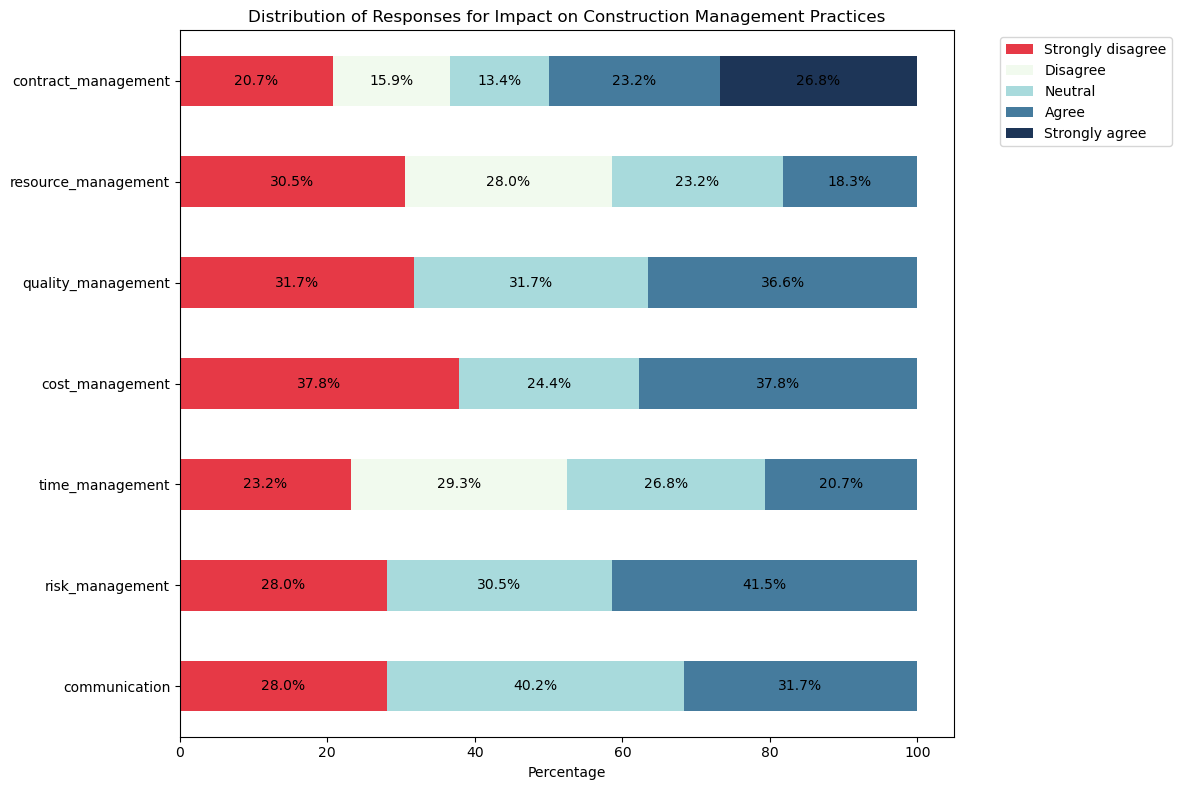

In [33]:
# Convert the counts into percentages
percentage_data = management_practices_df.replace(likert_mapping).apply(lambda x: x.value_counts(normalize=True)).T.fillna(0) * 100

colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']  # color list
ax = percentage_data.plot(kind='barh', stacked=True, color=colors, figsize=(12, 8))

for index, rect in enumerate(ax.patches):
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    
    # Labeling segments conditionally
    if width > 5:
        ax.text(x + width/2., y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=10)
    elif width > 0:
        ax.text(x + width + 3, y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=8)

# Rest of the plot aesthetics
ax.set_xlabel('Percentage')
ax.set_title('Distribution of Responses for Impact on Construction Management Practices')
ax.legend([likert_mapping[i] for i in range(1,6)], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


## Correlation Analysis

In [35]:

correlations = {}
p_values = {}

columns_to_check = ['communication', 'risk_management', 'time_management', 'cost_management', 'quality_management', 'resource_management', 'contract_management']

for column in columns_to_check:
    corr, p_value = pearsonr(df['digital_transformation_rating'], df[column])
    correlations[column] = corr
    p_values[column] = p_value

correlation_df = pd.DataFrame({'Correlation with Digital Transformation Rating': correlations, 'P-value': p_values})
print(correlation_df)


                     Correlation with Digital Transformation Rating   P-value
communication                                              0.034955  0.755217
risk_management                                           -0.115594  0.301067
time_management                                           -0.001417  0.989917
cost_management                                            0.229776  0.037835
quality_management                                         0.148116  0.184181
resource_management                                       -0.128743  0.249025
contract_management                                        0.081265  0.467965


## Section D:

In [41]:
# List of columns related to "Impact on Project Outcomes"
outcomes_columns = ['project_scheduling', 'budget_adherence', 'construction_quality', 'safety', 'client_satisfaction', 'environmental_sustainability']

# Compute mean and standard deviation for each variable
mean_outcomes = df[outcomes_columns].mean()
std_dev_outcomes = df[outcomes_columns].std()

# Compute the percentage of each response (from the Likert scale) for the variables
percentage_responses_outcomes = df[outcomes_columns].apply(lambda x: x.replace(likert_mapping).value_counts(normalize=True)).T.fillna(0) * 100

# Prepare the summary table
summary_outcomes = pd.concat([mean_outcomes, std_dev_outcomes], axis=1)
summary_outcomes.columns = ['Mean', 'Standard Deviation']

# Add percentage responses to the summary table, but only if they exist in the data
for key, value in likert_mapping.items():
    if value in percentage_responses_outcomes.columns:
        summary_outcomes[f'{value}'] = percentage_responses_outcomes[value].apply(lambda x: f"{x:.2f}%")

summary_outcomes


,Mean,Standard Deviation,Disagree,Neutral,Agree,Strongly agree
project_scheduling,4.085366,0.788830,0.00%,26.83%,37.80%,35.37%
budget_adherence,3.524390,1.113615,24.39%,23.17%,28.05%,24.39%
construction_quality,4.024390,0.831117,0.00%,32.93%,31.71%,35.37%
safety,3.853659,0.833288,0.00%,42.68%,29.27%,28.05%
client_satisfaction,3.987805,0.838781,0.00%,35.37%,30.49%,34.15%
environmental_sustainability,3.573171,1.030767,19.51%,24.39%,35.37%,20.73%


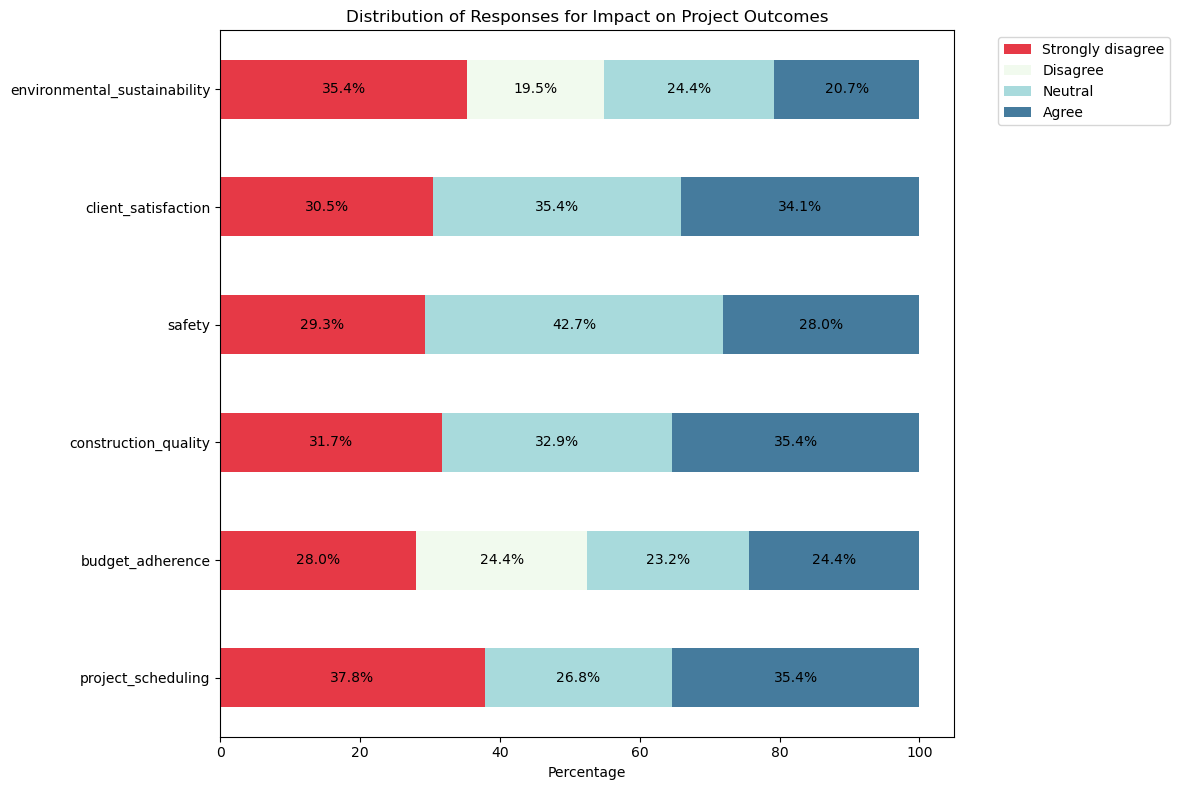

In [37]:
# Visualization
colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']  # color list
percentage_data_outcomes = df[outcomes_columns].replace(likert_mapping).apply(lambda x: x.value_counts(normalize=True)).T.fillna(0) * 100
ax = percentage_data_outcomes.plot(kind='barh', stacked=True, color=colors, figsize=(12, 8))

for index, rect in enumerate(ax.patches):
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    
    # Labeling segments conditionally
    if width > 5:
        ax.text(x + width/2., y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=10)
    elif width > 0:
        ax.text(x + width + 3, y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=8)

# Rest of the plot aesthetics
ax.set_xlabel('Percentage')
ax.set_title('Distribution of Responses for Impact on Project Outcomes')
ax.legend([likert_mapping[i] for i in range(1,6)], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()

## Challenges 

In [43]:
# Selecting the relevant columns
challenges_df = df[['initial_costs', 'learning_curve', 'resistance_to_change', 'lack_of_skills', 'data_security', 'system_integration']]

# Mapping for the Likert scale
likert_mapping = {
    1: 'Strongly disagree',
    2: 'Disagree',
    3: 'Neutral',
    4: 'Agree',
    5: 'Strongly agree'
}

# Compute mean and standard deviation for each variable
mean = challenges_df.mean()
std_dev = challenges_df.std()

# Compute the percentage of each response (from the Likert scale) for the variables
percentage_responses = challenges_df.apply(lambda x: x.replace(likert_mapping).value_counts(normalize=True)).T.fillna(0) * 100

# Ensure all Likert scale values are present in the percentage_responses DataFrame
for value in likert_mapping.values():
    if value not in percentage_responses.columns:
        percentage_responses[value] = 0.0

# Round the percentages to 2 decimal places and append percent sign
percentage_responses = percentage_responses.round(2).astype(str) + '%'

# Prepare the summary table
summary_challenges = pd.concat([mean, std_dev], axis=1)
summary_challenges.columns = ['Mean', 'Standard Deviation']

# Add percentage responses to the summary table
for key, value in likert_mapping.items():
    summary_challenges[f'{value}'] = percentage_responses[value]

summary_challenges

,Mean,Standard Deviation,Strongly disagree,Disagree,Neutral,Agree,Strongly agree
initial_costs,4.573171,0.497661,0.0%,0.0%,0.0%,42.68%,57.32%
learning_curve,3.951220,0.815020,0.0%,0.0%,35.37%,34.15%,30.49%
resistance_to_change,4.548780,0.500677,0.0%,0.0%,0.0%,45.12%,54.88%
lack_of_skills,3.841463,0.793018,0.0%,0.0%,40.24%,35.37%,24.39%
data_security,3.573171,1.133448,0.0%,25.61%,17.07%,31.71%,25.61%
system_integration,4.439024,0.499322,0.0%,0.0%,0.0%,56.1%,43.9%


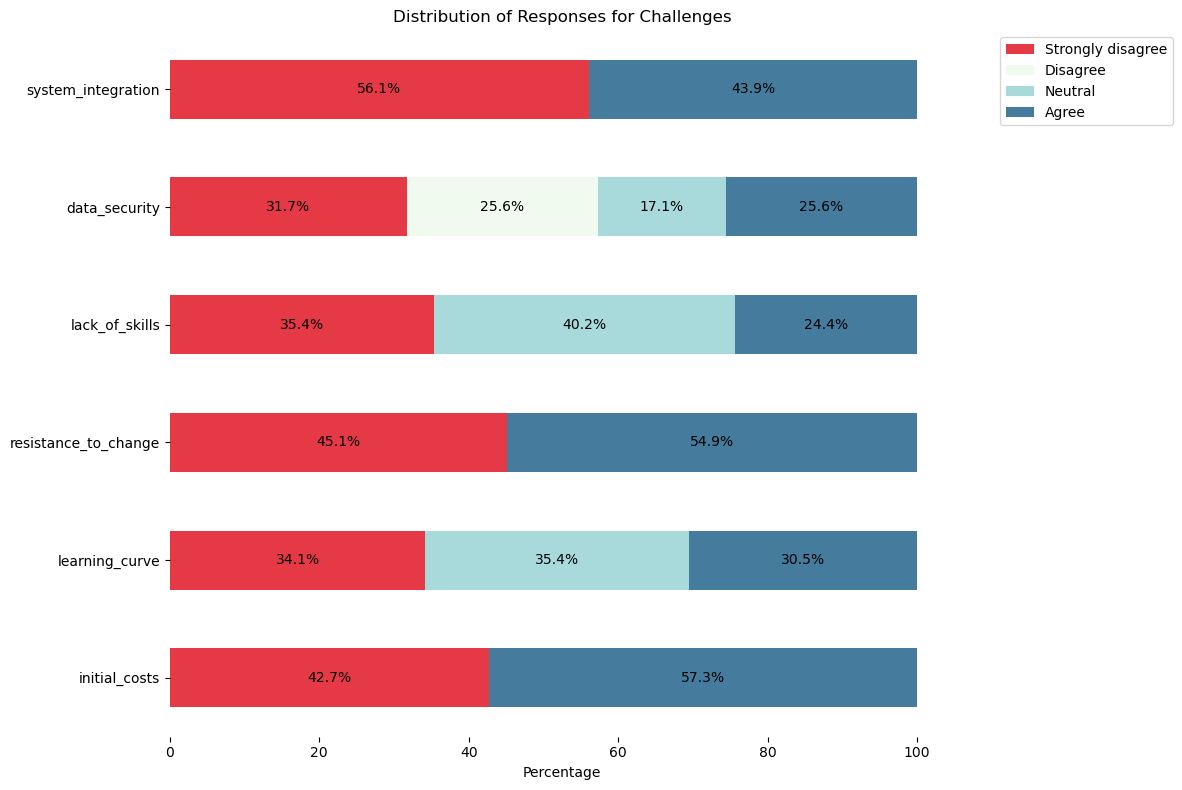

In [44]:
# Convert the counts into percentages
percentage_data = challenges_df.replace(likert_mapping).apply(lambda x: x.value_counts(normalize=True)).T.fillna(0) * 100

# Define a color palette for the Likert scale
colors = ['#E63946', '#F1FAEE', '#A8DADC', '#457B9D', '#1D3557']

# Plotting
ax = percentage_data.plot(kind='barh', stacked=True, color=colors, figsize=(12, 8))

# Adding percentage labels to the segments of the bars
for index, rect in enumerate(ax.patches):
    width, height = rect.get_width(), rect.get_height()
    x, y = rect.get_xy()
    
    # Labeling segments conditionally
    if width > 5:
        ax.text(x + width/2., y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=10)
    elif width > 0:
        ax.text(x + width + 3, y + height/2., f"{width:.1f}%", ha='center', va='center', color='black', fontsize=8)

# Aesthetics
ax.set_xlabel('Percentage')
ax.set_title('Distribution of Responses for Challenges')
ax.legend([likert_mapping[i] for i in range(1,6)], bbox_to_anchor=(1.05, 1), loc='upper left')
sns.despine(left=True, bottom=True)  # Remove the top and right spines for a cleaner look
plt.tight_layout()
plt.show()